<a href="https://colab.research.google.com/github/lucaspinheiro27/Deep_Learning_AI/blob/main/Redes_Neurais_Multicamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
df = pd.read_csv("gs_dataframe.csv", sep=',', encoding='latin1')
df

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Presença de Espécie Marinha,Tipo de Habitat,Presença de Algas,Nível de Poluição
0,16.46,35.77,75.64,8.09,0,Recife de Coral,Sim,Médio
1,18.50,33.55,59.24,7.96,1,Mangue,Não,Baixo
2,24.51,36.41,11.89,8.34,1,Plataforma Continental,Sim,Alto
3,17.20,37.62,22.95,7.69,1,Recife de Coral,Não,Baixo
4,23.39,38.73,44.22,7.88,1,Mangue,Sim,Médio
...,...,...,...,...,...,...,...,...
89,24.20,32.90,38.60,8.16,1,Plataforma Continental,Sim,Alto
90,13.40,38.00,96.30,7.98,0,Recife de Coral,Não,Médio
91,22.60,34.40,33.20,8.14,1,Mangue,Sim,Baixo
92,30.10,39.20,44.60,8.31,1,Plataforma Continental,Não,Alto


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura da Água (°C)     94 non-null     float64
 1   Salinidade (ppt)             94 non-null     float64
 2   Profundidade (m)             94 non-null     float64
 3   pH                           94 non-null     float64
 4   Presença de Espécie Marinha  94 non-null     int64  
 5   Tipo de Habitat              94 non-null     object 
 6   Presença de Algas            94 non-null     object 
 7   Nível de Poluição            94 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ KB


In [76]:
df.isna().sum()

Temperatura da Água (°C)       0
Salinidade (ppt)               0
Profundidade (m)               0
pH                             0
Presença de Espécie Marinha    0
Tipo de Habitat                0
Presença de Algas              0
Nível de Poluição              0
dtype: int64

In [77]:
!pip install skimpy

In [78]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 94     │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Temperatura da Água    │   0 │     0 │   20.43 │    5.74 │  10.25 │  15.53 │ 20.69 │ 25.18 │   31 │ ▇▇▇▇▇▅ │  │
│ │ (°C)                   │     │       │         │         │        │        │       │       │      │        │  │
│ │ Salinidade (ppt)       │   0 │     0 │   35.42 │   2.373 │  31.22 │  33.51 │ 35.29 │  37.2 │ 40.1 │ ▅▇▇▇▆▃ │  │
│ │ Profundidade (m)       │   0 │     0 │   47.11 │   23.82 │  10.53 │  27.69 │ 44.41 │ 63.41 │ 96.3 │ ▇▇▆▅▅▃ │  │
│ │ pH                     │   0 │     0 │   8.056 │  0.2017 │   7.65 │  7.893 │  8.04 │ 8.215 │  8.5 │ ▃▇▇▇▆▂ │  │
│ │ Presença de Espécie    │   0 │     0 │  0.5745 │  0.4971 │      0 │      0 │     1 │     1 │    1 │ ▆    ▇ │  │
│ │ Marinha                │     │       │         │         │        │        │       │       │      │        │  │
│ └────────────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tipo de Habitat                   │      0 │         0 │                         2 │                   189 │  │
│ │ Presença de Algas                 │      0 │         0 │                         1 │                    94 │  │
│ │ Nível de Poluição                 │      0 │         0 │                         1 │                    94 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [79]:
df = pd.get_dummies(df, columns=['Tipo de Habitat', 'Presença de Algas',  'Nível de Poluição'])
df

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Presença de Espécie Marinha,Tipo de Habitat_Mangue,Tipo de Habitat_Plataforma Continental,Tipo de Habitat_Recife de Coral,Presença de Algas_Não,Presença de Algas_Sim,Nível de Poluição_Alto,Nível de Poluição_Baixo,Nível de Poluição_Médio
0,16.46,35.77,75.64,8.09,0,False,False,True,False,True,False,False,True
1,18.50,33.55,59.24,7.96,1,True,False,False,True,False,False,True,False
2,24.51,36.41,11.89,8.34,1,False,True,False,False,True,True,False,False
3,17.20,37.62,22.95,7.69,1,False,False,True,True,False,False,True,False
4,23.39,38.73,44.22,7.88,1,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,24.20,32.90,38.60,8.16,1,False,True,False,False,True,True,False,False
90,13.40,38.00,96.30,7.98,0,False,False,True,True,False,False,False,True
91,22.60,34.40,33.20,8.14,1,True,False,False,False,True,False,True,False
92,30.10,39.20,44.60,8.31,1,False,True,False,True,False,True,False,False


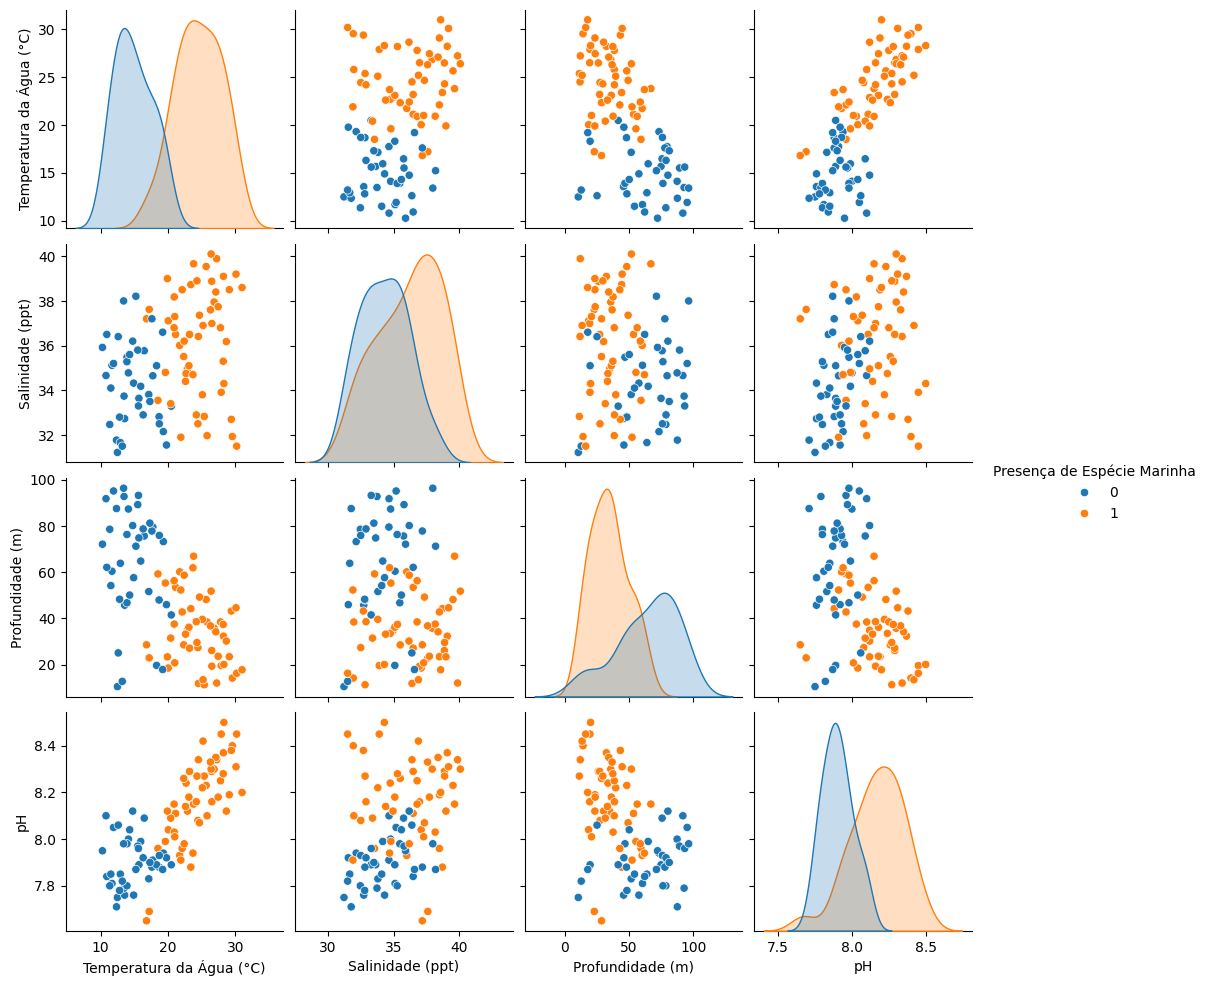

In [80]:
import seaborn as sb
sb.pairplot(df[['Temperatura da Água (°C)','Salinidade (ppt)','Profundidade (m)','pH',	'Presença de Espécie Marinha']], hue='Presença de Espécie Marinha')

In [81]:
from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [82]:
def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)

In [83]:
# Chamando a função para verificar normalidade
for coluna in ['Temperatura da Água (°C)','Salinidade (ppt)','Profundidade (m)','pH']:
  if verifica_normalidade(df, coluna):
    df[coluna] = padronizar(df[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    df[coluna] = normalizar(df[coluna])

A coluna 'Temperatura da Água (°C)' não segue uma distribuição normal
A coluna 'Salinidade (ppt)' não segue uma distribuição normal
A coluna 'Profundidade (m)' não segue uma distribuição normal
A coluna 'pH' segue uma distribuição normal


In [84]:
df

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Presença de Espécie Marinha,Tipo de Habitat_Mangue,Tipo de Habitat_Plataforma Continental,Tipo de Habitat_Recife de Coral,Presença de Algas_Não,Presença de Algas_Sim,Nível de Poluição_Alto,Nível de Poluição_Baixo,Nível de Poluição_Médio
0,0.299277,0.512387,0.759123,0.169707,0,False,False,True,False,True,False,False,True
1,0.397590,0.262387,0.567914,-0.478360,1,True,False,False,True,False,False,True,False
2,0.687229,0.584459,0.015856,1.415989,1,False,True,False,False,True,True,False,False
3,0.334940,0.720721,0.144806,-1.824346,1,False,False,True,True,False,False,True,False
4,0.633253,0.845721,0.392795,-0.877171,1,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.672289,0.189189,0.327271,0.518666,1,False,True,False,False,True,True,False,False
90,0.151807,0.763514,1.000000,-0.378658,0,False,False,True,True,False,False,False,True
91,0.595181,0.358108,0.264312,0.418963,1,True,False,False,False,True,False,True,False
92,0.956627,0.898649,0.397225,1.266435,1,False,True,False,True,False,True,False,False


In [85]:
saídas = df.loc[:, 'Presença de Espécie Marinha']
saidas = pd.DataFrame(saídas)
saidas

,Presença de Espécie Marinha
0,0
1,1
2,1
3,1
4,1
...,...
89,1
90,0
91,1
92,1


In [86]:
colunas = ['Temperatura da Água (°C)', 'Salinidade (ppt)', 'Profundidade (m)', 'pH', 'Tipo de Habitat_Mangue',	'Tipo de Habitat_Plataforma Continental',	'Tipo de Habitat_Recife de Coral',	'Presença de Algas_Não',	'Presença de Algas_Sim',	'Nível de Poluição_Alto',	'Nível de Poluição_Baixo',	'Nível de Poluição_Médio']
entradas = df[colunas]
entradas = pd.DataFrame(entradas)
entradas

,Temperatura da Água (°C),Salinidade (ppt),Profundidade (m),pH,Tipo de Habitat_Mangue,Tipo de Habitat_Plataforma Continental,Tipo de Habitat_Recife de Coral,Presença de Algas_Não,Presença de Algas_Sim,Nível de Poluição_Alto,Nível de Poluição_Baixo,Nível de Poluição_Médio
0,0.299277,0.512387,0.759123,0.169707,False,False,True,False,True,False,False,True
1,0.397590,0.262387,0.567914,-0.478360,True,False,False,True,False,False,True,False
2,0.687229,0.584459,0.015856,1.415989,False,True,False,False,True,True,False,False
3,0.334940,0.720721,0.144806,-1.824346,False,False,True,True,False,False,True,False
4,0.633253,0.845721,0.392795,-0.877171,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.672289,0.189189,0.327271,0.518666,False,True,False,False,True,True,False,False
90,0.151807,0.763514,1.000000,-0.378658,False,False,True,True,False,False,False,True
91,0.595181,0.358108,0.264312,0.418963,True,False,False,False,True,False,True,False
92,0.956627,0.898649,0.397225,1.266435,False,True,False,True,False,True,False,False


In [87]:
num_linhas_entradas = len(entradas)
num_colunas_entradas = len(entradas.columns)
print("Número de linhas:", num_linhas_entradas)
print("Número de colunas:", num_colunas_entradas)

Número de linhas: 94
Número de colunas: 12


In [88]:
num_linhas_saidas = len(saidas)
num_colunas_saidas = len(saidas.columns)
print("Número de linhas:", num_linhas_saidas)
print("Número de colunas:", num_colunas_saidas)

Número de linhas: 94
Número de colunas: 1


In [89]:
n_neuronios = num_colunas_entradas + num_colunas_saidas / 2
n_neuronios

12.5

In [90]:
n_neuronios = num_colunas_entradas * 2/3 + num_colunas_saidas
n_neuronios

9.0

In [91]:
if n_neuronios < 2 * num_colunas_entradas:
    print("n_neuronios é menor que o dobro de num_colunas_entradas")
else:
    print("n_neuronios não é menor que o dobro de num_colunas_entradas")
n_neuronios

n_neuronios é menor que o dobro de num_colunas_entradas


9.0

In [92]:
redeneural = MLPClassifier(
    verbose=True,
    max_iter=10000,
    tol=0.000001,
    activation='relu',
    hidden_layer_sizes=(9, 9),
    learning_rate_init=0.0001
)

In [93]:
redeneural.fit(entradas, saidas)

Iteration 1, loss = 0.79639121
Iteration 2, loss = 0.79599603
Iteration 3, loss = 0.79560122
Iteration 4, loss = 0.79520917
Iteration 5, loss = 0.79481951
Iteration 6, loss = 0.79443234
Iteration 7, loss = 0.79404568
Iteration 8, loss = 0.79365632
Iteration 9, loss = 0.79326780
Iteration 10, loss = 0.79287966
Iteration 11, loss = 0.79249189
Iteration 12, loss = 0.79210790
Iteration 13, loss = 0.79172465
Iteration 14, loss = 0.79134196
Iteration 15, loss = 0.79095981
Iteration 16, loss = 0.79057817
Iteration 17, loss = 0.79019971
Iteration 18, loss = 0.78982414
Iteration 19, loss = 0.78944968
Iteration 20, loss = 0.78907553
Iteration 21, loss = 0.78870196
Iteration 22, loss = 0.78832900
Iteration 23, loss = 0.78795782
Iteration 24, loss = 0.78759150
Iteration 25, loss = 0.78722560
Iteration 26, loss = 0.78686046
Iteration 27, loss = 0.78649604
Iteration 28, loss = 0.78613248
Iteration 29, loss = 0.78577266
Iteration 30, loss = 0.78541812
Iteration 31, loss = 0.78506479
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 5001, loss = 0.07339052
Iteration 5002, loss = 0.07335717
Iteration 5003, loss = 0.07332384
Iteration 5004, loss = 0.07329077
Iteration 5005, loss = 0.07325748
Iteration 5006, loss = 0.07322432
Iteration 5007, loss = 0.07319120
Iteration 5008, loss = 0.07315802
Iteration 5009, loss = 0.07312499
Iteration 5010, loss = 0.07309171
Iteration 5011, loss = 0.07305861
Iteration 5012, loss = 0.07302545
Iteration 5013, loss = 0.07299243
Iteration 5014, loss = 0.07295941
Iteration 5015, loss = 0.07292649
Iteration 5016, loss = 0.07289342
Iteration 5017, loss = 0.07286029
Iteration 5018, loss = 0.07282737
Iteration 5019, loss = 0.07279431
Iteration 5020, loss = 0.07276137
Iteration 5021, loss = 0.07272850
Iteration 5022, loss = 0.07269554
Iteration 5023, loss = 0.07266267
Iteration 5024, loss = 0.07262978
Iteration 5025, loss = 0.07259708
Iteration 5026, loss = 0.07256428
Iteration 5027, loss = 0.07253128
Iteration 5028, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(9, 9), learning_rate_init=0.0001,
              max_iter=10000, tol=1e-06, verbose=True)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y = df['Presença de Espécie Marinha']
X = df.drop('Presença de Espécie Marinha', axis=1)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [96]:
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x.transform(X_test)

In [97]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Erro mínimo: 0.0 no K = 1


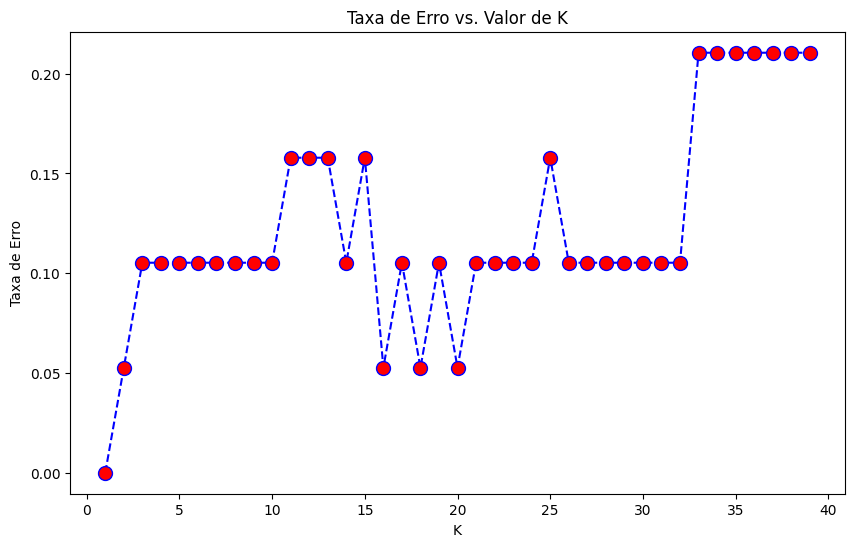

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')
req_k_value = error_rate.index(min(error_rate))+1
print("Erro mínimo:",min(error_rate),"no K =",req_k_value)

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
k_range = range(1, 31)
k_scores = []

In [101]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [102]:
best_k = k_range[np.argmax(k_scores)]
print(f'Melhor valor de k: {best_k}')
print(f'Acurácia com k={best_k}: {max(k_scores)}')

Melhor valor de k: 1
Acurácia com k=1: 0.9788888888888889


In [103]:
knn = KNeighborsClassifier(n_neighbors=1)

# Treinar o modelo kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
y_pred = knn.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)

Acurácia do modelo KNN: 0.9473684210526315


In [105]:
print("n=",len(y))
print("k=", (len(y))**0.5)

n= 94
k= 9.695359714832659


In [106]:
for k in range(3, 51, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  # Treinar o modelo kNN
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Avaliar a acurácia do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia para k={k}:", accuracy)

Acurácia para k=3: 0.7894736842105263
Acurácia para k=5: 0.7894736842105263
Acurácia para k=7: 0.7894736842105263
Acurácia para k=9: 0.7368421052631579
Acurácia para k=11: 0.8421052631578947
Acurácia para k=13: 0.8947368421052632
Acurácia para k=15: 0.8421052631578947
Acurácia para k=17: 0.9473684210526315
Acurácia para k=19: 0.9473684210526315
Acurácia para k=21: 0.9473684210526315
Acurácia para k=23: 1.0
Acurácia para k=25: 1.0
Acurácia para k=27: 0.9473684210526315
Acurácia para k=29: 0.8421052631578947
Acurácia para k=31: 0.8421052631578947
Acurácia para k=33: 0.7894736842105263
Acurácia para k=35: 0.7894736842105263
Acurácia para k=37: 0.7894736842105263
Acurácia para k=39: 0.7894736842105263
Acurácia para k=41: 0.7894736842105263
Acurácia para k=43: 0.7894736842105263
Acurácia para k=45: 0.8421052631578947
Acurácia para k=47: 0.8421052631578947
Acurácia para k=49: 0.8947368421052632


In [107]:
# Selecionar o primeiro exemplo do conjunto de teste
exemplo = X_test.iloc[[0]]
saida_real = y_test.iloc[0]

# Fazer a previsão com o modelo treinado
previsao = knn.predict(exemplo)

# Imprimir a previsão e a saída real
print("Previsão:", previsao[0])
print("Saída Real:", saida_real)

Previsão: 1
Saída Real: 1


In [108]:
previsoes = knn.predict(X_test)

# Criar um DataFrame para comparar as previsões com as saídas reais
comparacao = pd.DataFrame({'Previsão': previsoes, 'Saída Real': y_test})

# Mostrar o DataFrame de comparação
comparacao

,Previsão,Saída Real
40,1,1
22,1,1
55,1,1
72,0,0
0,1,0
26,1,1
39,0,0
67,1,1
10,0,0
44,1,1
